In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [4]:
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [5]:
# Date cleaning 
df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


In [6]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True) #we use dayfirst = True to ensure the dd/mm/yy format 
df['year'] = df['date'].dt.year.astype(int)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


In [7]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0) #replace scores with * with 1 and the rest with 0
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


In [8]:
#dropping the odi_number feature because it aadds no value to the analysis
df.drop(columns='odi_number',inplace=True)

In [9]:
#droppnig those innings where dhoni did not bat and storing in a new dataframe
#take all the columns, starting with runs_scored

df_new = df.loc[((df['score']) != 'DNB') & (df['score']!='TDNB'),'runs_scored':]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [10]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['fours'] = df_new['fours'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['sixes'] = df_new['sixes'].astype(int)
df_new.head()

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0


In [11]:
#Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d,%Y') #first match
print('First match ', first_match_date)

last_match_date = df['date'].dt.date.max().strftime('%B %d,%Y') #last match
print('Last match :', last_match_date)

number_of_matches = df.shape[0] #number of matches played in the career
print('Number of matches played: ', number_of_matches)

number_of_innings = df_new.shape[0] 
print('Number of innings played: ', number_of_innings)

not_outs = df_new['not_out'].sum() 
print('Not_outs ',not_outs)

runs_scored = df_new['runs_scored'].sum()
print('Runs scored in the career: ', runs_scored)

balls_faced = df_new['balls_faced'].sum() 
print('Balls_faced ',balls_faced)

career_sr = (runs_scored/balls_faced)*100 
print('Career_StrikeRate: {:.2f} '.format(career_sr))

career_avg = (runs_scored/(number_of_innings-not_outs))
print('Career_Average: {:.2f} '.format(career_avg))

#highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
#highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] # highest score
highest_score = df_new['runs_scored'].max()
not_out_for_highest = (
    df_new[df_new['runs_scored'] == highest_score]['not_out']
    .replace([1, 0], ["*", ""])  # Replace 1 with *, 0 with null
    .iloc[0]
)
print('Highest score in career:', highest_score, not_out_for_highest)
hundreds = (df_new['runs_scored'] >= 100).sum()
# hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
# fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

First match  December 23,2004
Last match : July 09,2019
Number of matches played:  350
Number of innings played:  297
Not_outs  84
Runs scored in the career:  10773
Balls_faced  12303
Career_StrikeRate: 87.56 
Career_Average: 50.58 
Highest score in career: 183 *
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


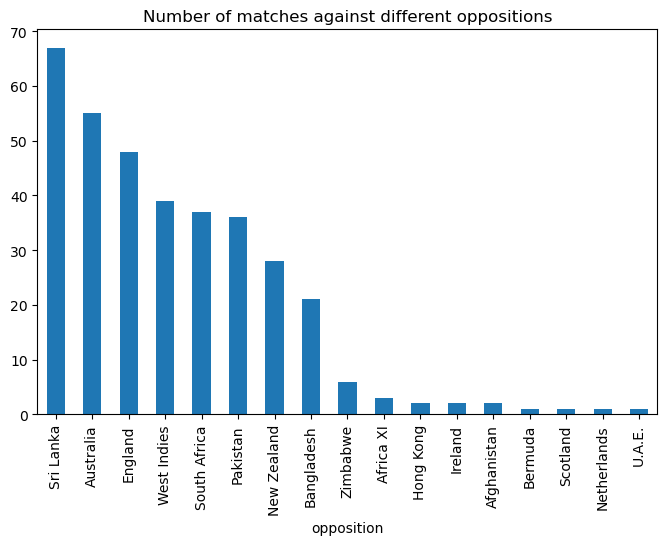

In [12]:
# number of matches played against different oppositions
# Count the occurrences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5))
plt.show()

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


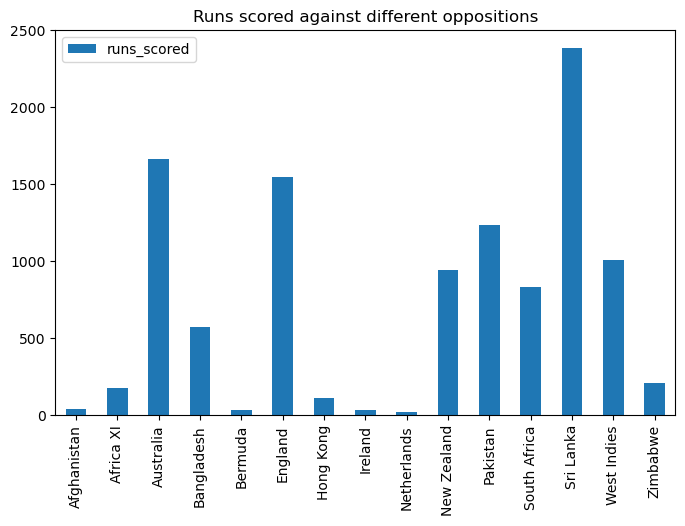

In [13]:
grouped_by_opposition = df_new.groupby('opposition')
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x='opposition',kind='bar',title='Runs scored against different oppositions', figsize=(8, 5))
plt.xlabel(None)
plt.show()

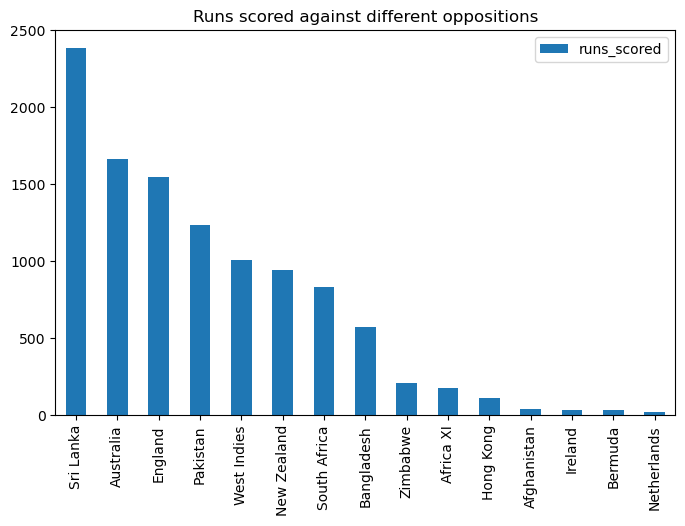

In [14]:
sorted = runs_scored_by_opposition.sort_values(by='runs_scored',ascending=False)
sorted.plot(x='opposition',kind='bar',title='Runs scored against different oppositions',figsize=(8,5))
plt.xlabel(None)
plt.show()

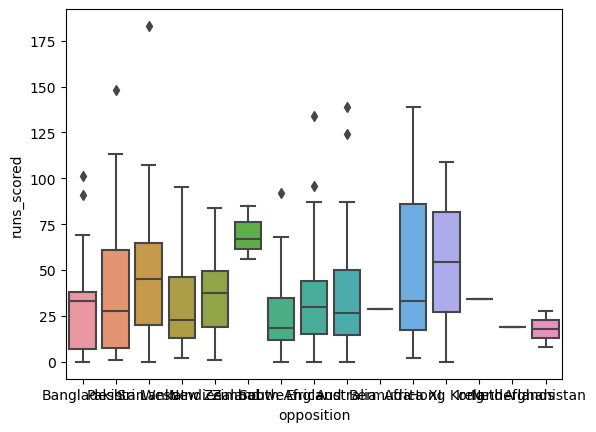

In [15]:
#boxplot of runs against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_new)
plt.show()

In [16]:
opposition_list = ['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']
#filter rows where opposition is in the list
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]

#sort the filtered dataframe in descending order of runs_scored
df_filtered = df_filtered.sort_values(by='runs_scored',ascending=False)
df_filtered

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
21,183,145,126.20,15,10,Sri Lanka,Jaipur,2005-10-31,2005,1
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
228,139,121,114.87,12,5,Australia,Mohali,2013-10-19,2013,1
284,134,122,109.83,10,6,England,Cuttack,2017-01-19,2017,0
146,124,107,115.88,9,3,Australia,Nagpur,2009-10-28,2009,0
...,...,...,...,...,...,...,...,...,...,...
74,0,4,0.00,0,0,South Africa,Belfast,2007-06-29,2007,0
273,0,3,0.00,0,0,Australia,Canberra,2016-01-20,2016,0
171,0,1,0.00,0,0,Australia,Visakhapatnam,2010-10-20,2010,0
223,0,4,0.00,0,0,England,Birmingham,2013-06-23,2013,0


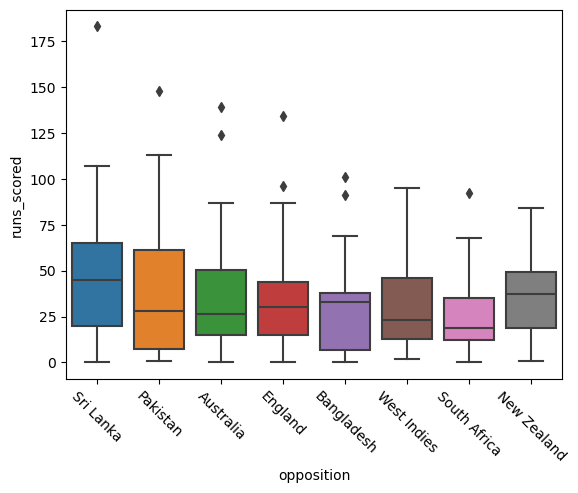

In [17]:
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered)
plt.xticks(rotation=(-45))
# plt.yticks(rotation=(45))
plt.show()

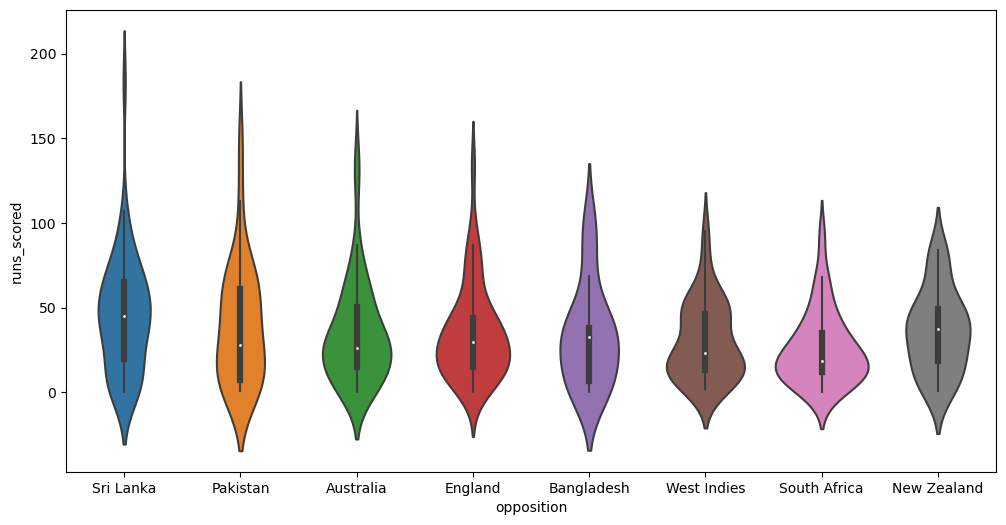

In [18]:
#Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x='opposition',y='runs_scored',data=df_filtered)
plt.show()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


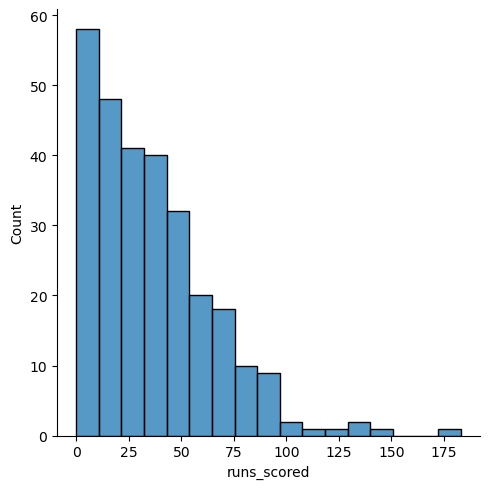

In [19]:
#Distribution plot without KDE

sns.displot(data=df_filtered,x='runs_scored',kde=False)
plt.show()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


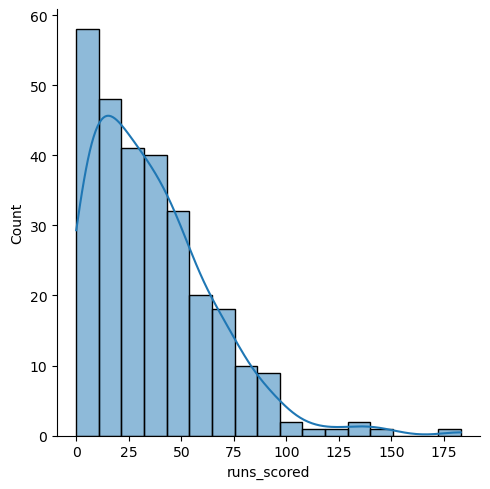

In [20]:
#Distribution plot with KDE

sns.displot(data=df_filtered,x='runs_scored',kde=True)
plt.show()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


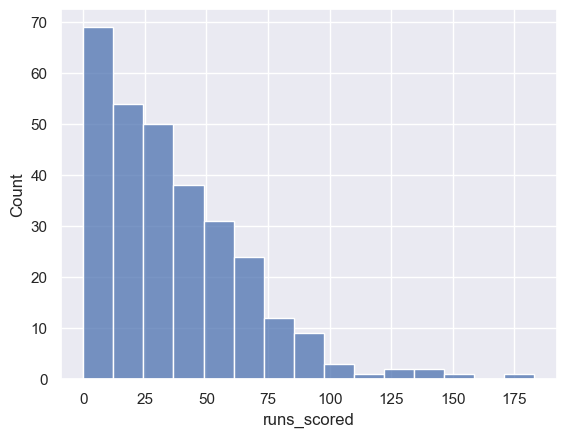

In [21]:
#Histogram with bins

sns.set(style='darkgrid')
sns.histplot(data=df_new,x='runs_scored',bins=15) #bins = number of bars in the plot
plt.show()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


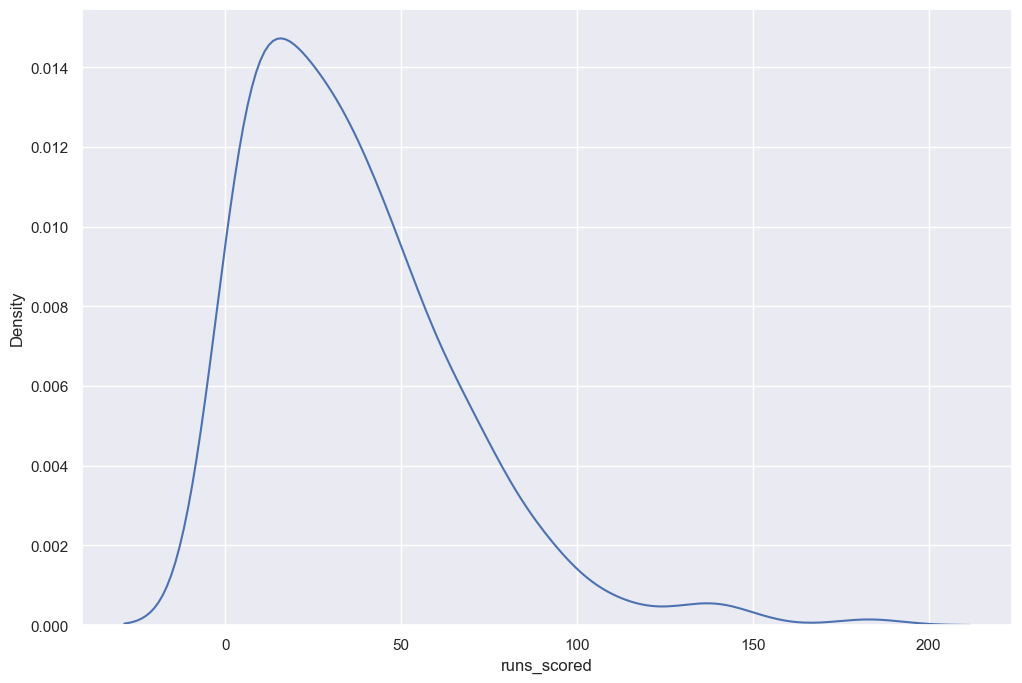

In [22]:
#KDE plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored') #probablity of every score (eg: dhoni has scored 50runs for 9-10% of the times)
plt.show()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


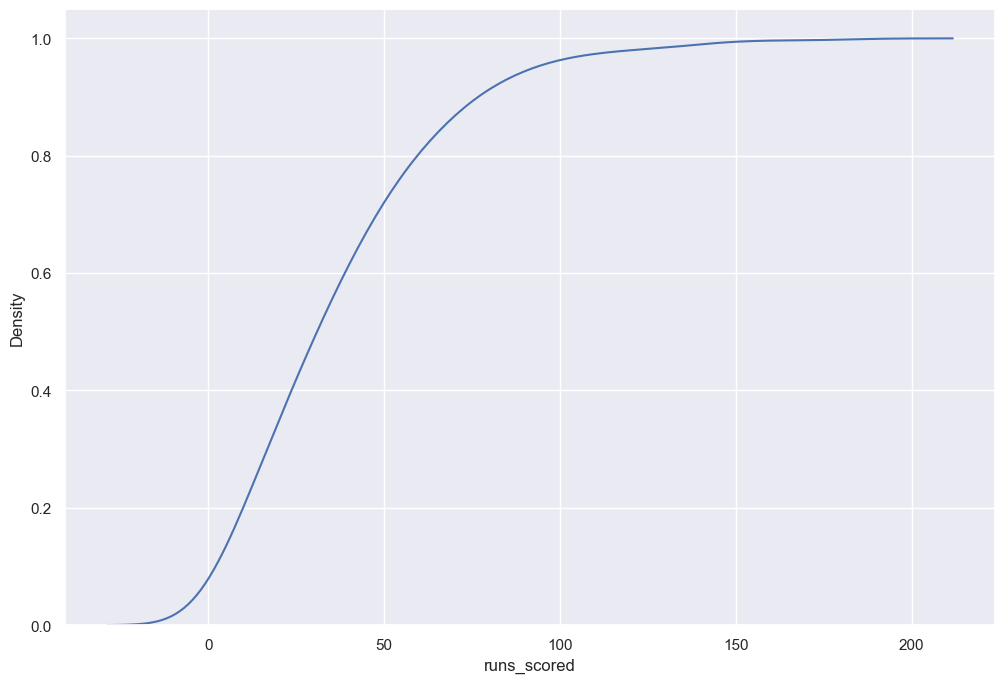

In [23]:
#KDE plot with cumulative probablity
plt.figure(figsize=(12,8))
sns.kdeplot(data=df_new,x='runs_scored',cumulative=True) #probablity of him scoring runs from 0-100 is around 98-99%
plt.show()


In [24]:
 # df_filtered.plot.kde()
df_new['strike_rate'] = df_new.strike_rate.astype(int)
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 349
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   runs_scored  297 non-null    int32         
 1   balls_faced  297 non-null    int32         
 2   strike_rate  297 non-null    int32         
 3   fours        297 non-null    int32         
 4   sixes        297 non-null    int32         
 5   opposition   297 non-null    object        
 6   ground       297 non-null    object        
 7   date         297 non-null    datetime64[ns]
 8   year         297 non-null    int32         
 9   not_out      297 non-null    int32         
dtypes: datetime64[ns](1), int32(7), object(2)
memory usage: 17.4+ KB


In [26]:
 # df_new[['runs_scored','balls_faced']].plot.kde()

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1800x1200 with 0 Axes>

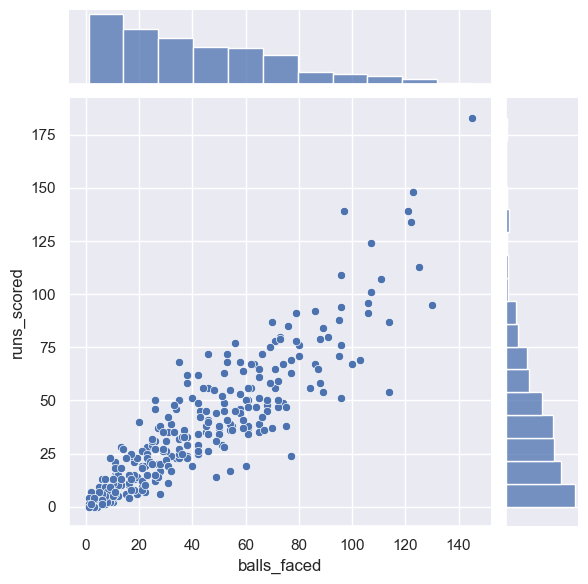

In [27]:
#Jointplot
plt.figure(figsize=(18,12))
sns.jointplot(x='balls_faced',y='runs_scored',data=df_new,kind='scatter')
plt.show()

<Axes: >

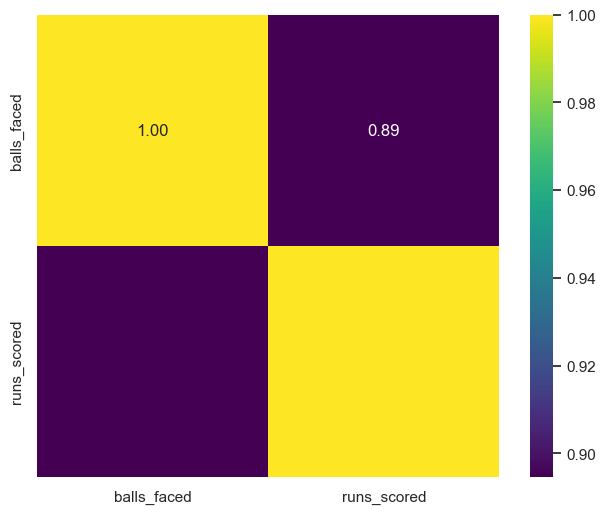

In [28]:
#Heatmap
correlation_matrix = df_new[['balls_faced','runs_scored']].corr()

#Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix,annot=True,cmap='viridis',square=True,fmt='.2f')

In [29]:
# df.strike_rate = df.runs_scored/df.balls_faced
grouped_by_opposition = df_filtered.groupby('opposition')
# sum_runs_scored = df_filtered['runs_scored'].sum()
# sum_balls_faced = df_filtered['balls_faced'].sum()

#Aggrefating 'balls_face' and 'runs_scored' using sum
agg_sum = grouped_by_opposition.agg({'balls_faced':'sum','runs_scored':'sum'})
df_strike_rate = agg_sum

df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/df_strike_rate['balls_faced'])*100
df_strike_rate

,balls_faced,runs_scored,strike_rate
opposition,,,
Australia,2052,1660,80.896686
Bangladesh,682,569,83.431085
England,1758,1546,87.940842
New Zealand,1140,940,82.456140
Pakistan,1361,1231,90.448200
South Africa,950,830,87.368421
Sri Lanka,2645,2383,90.094518
West Indies,1108,1005,90.703971


In [30]:
# df_strike_rate.reset_index(inplace=True)
df_strike_rate

,balls_faced,runs_scored,strike_rate
opposition,,,
Australia,2052,1660,80.896686
Bangladesh,682,569,83.431085
England,1758,1546,87.940842
New Zealand,1140,940,82.456140
Pakistan,1361,1231,90.448200
South Africa,950,830,87.368421
Sri Lanka,2645,2383,90.094518
West Indies,1108,1005,90.703971


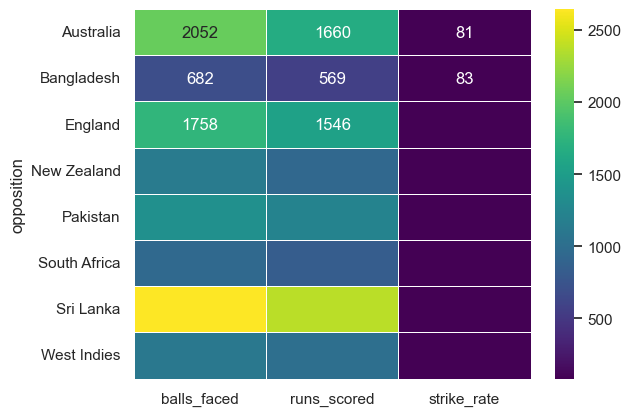

In [31]:
# correlation_matrix = df_strike_rate[['balls_faced','runs_scored']].corr()
# plt.figure(figsize=(8,6))
sns.heatmap(df_strike_rate,linewidth=0.5, annot = True, fmt='.0f',cmap='viridis')
plt.show()

              strike_rate
opposition               
Australia       80.896686
Bangladesh      83.431085
England         87.940842
New Zealand     82.456140
Pakistan        90.448200
South Africa    87.368421
Sri Lanka       90.094518
West Indies     90.703971


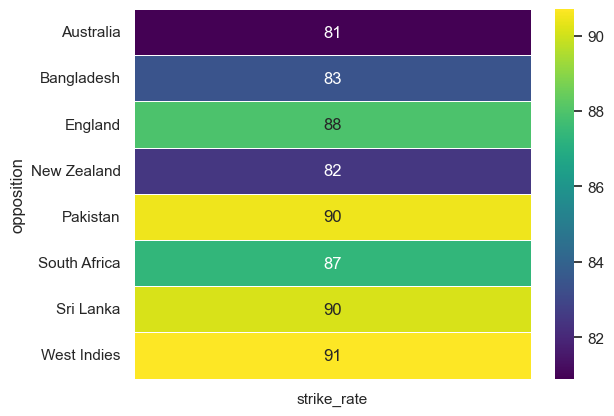

In [32]:
df_strike_rate = df_strike_rate[['strike_rate']]
print(df_strike_rate)
sns.heatmap(df_strike_rate,linewidth=0.5, annot = True, fmt='.0f',cmap='viridis')
plt.show()

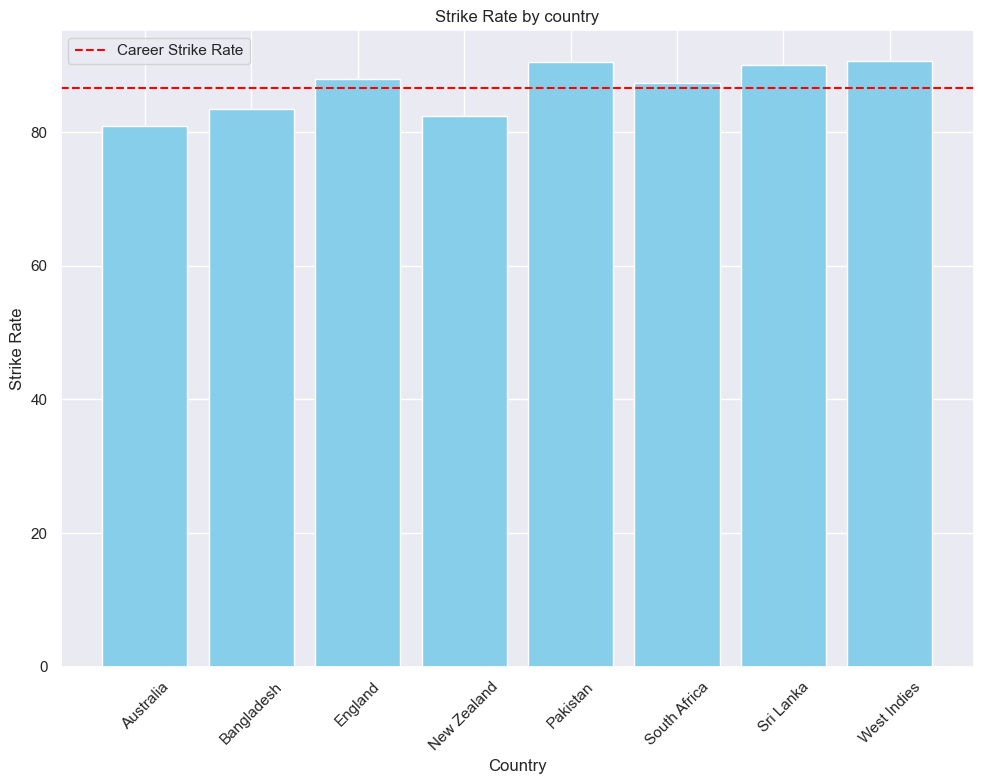

In [33]:
#Resetting index to make opposition a regular column

df_strike_rate.reset_index(inplace=True)
plt.figure(figsize=(10,8))
plt.bar(df_strike_rate['opposition'],df_strike_rate['strike_rate'],color='skyblue')

aggregate_strike_rate = df_strike_rate['strike_rate'].mean()
plt.axhline(y=aggregate_strike_rate,color='red',linestyle='--',label='Career Strike Rate')

#Set labels
plt.xlabel('Country')
plt.ylabel('Strike Rate')
plt.title('Strike Rate by country')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


In [35]:
grouped_by_opposition = df_filtered.groupby('opposition')
# sum_runs_scored = df_filtered['runs_scored'].sum()
# sum_balls_faced = df_filtered['balls_faced'].sum()
print(grouped_by_opposition)
#Aggrefating 'balls_face' and 'runs_scored' using sum
agg_sum = grouped_by_opposition.agg({'runs_scored':'sum','fours':'sum','sixes':'sum'})
df_runs_in_boundaries = agg_sum

df_runs_in_boundaries['runs_in_boundaries'] = (df_runs_in_boundaries['fours']*4) + (df_runs_in_boundaries['sixes']*6)
# df_runs_in_boundaries['runs_scored'] = df_filtered['runs_scored']
df_runs_in_boundaries

,runs_scored,fours,sixes,runs_in_boundaries
opposition,,,,
Australia,1660,112,33,646
Bangladesh,569,49,3,214
England,1546,129,34,720
New Zealand,940,73,20,412
Pakistan,1231,108,25,582
South Africa,830,67,18,376
Sri Lanka,2383,182,45,998
West Indies,1005,63,28,420


In [36]:
# print(type(df_runs_in_boundaries.runs_in_boundaries[0]))
df_runs_in_boundaries.reset_index(inplace=True)
df_runs_in_boundaries

,opposition,runs_scored,fours,sixes,runs_in_boundaries
0,Australia,1660,112,33,646
1,Bangladesh,569,49,3,214
2,England,1546,129,34,720
3,New Zealand,940,73,20,412
4,Pakistan,1231,108,25,582
5,South Africa,830,67,18,376
6,Sri Lanka,2383,182,45,998
7,West Indies,1005,63,28,420


<BarContainer object of 8 artists>

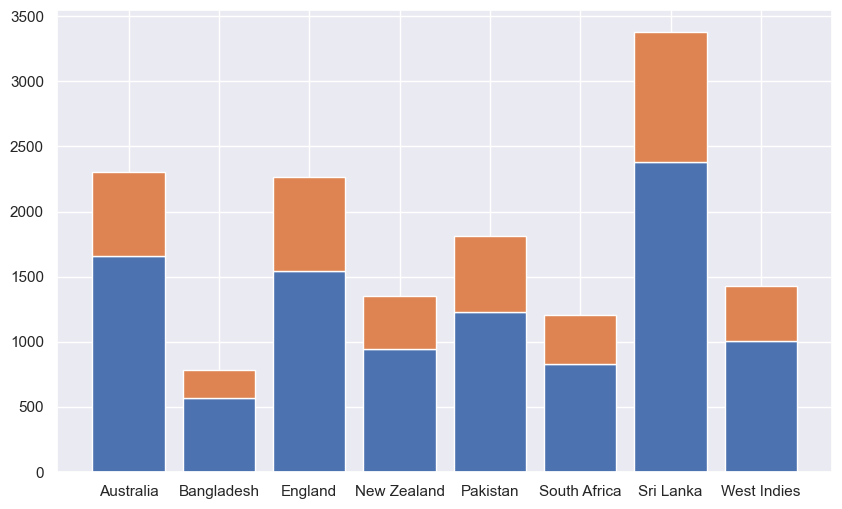

In [37]:
plt.figure(figsize=(10,6))
plt.bar(df_runs_in_boundaries['opposition'],df_runs_in_boundaries['runs_scored'],label='Runs Scored')
plt.bar(df_runs_in_boundaries['opposition'],df_runs_in_boundaries['runs_in_boundaries'],bottom=df_runs_in_boundaries['runs_scored'],label='Runs_in_boundaries')

In [38]:
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(df_runs_in_boundaries['opposition']))
# plt.bar(index,)

# plt.xlabel('Opposition')
# plt.ylabel('runs')
# plt.title('Runs scored and runs in boundaries by opposition')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


<Figure size 1000x600 with 0 Axes>

In [39]:
# import plotly.figure_factory as ff
# import numpy as np
# np.random.seed(1)

# x = np.random.randn(1000)
# hist_data = [x]
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot(hist_data,group_labels)
# fig.show()

In [42]:
df_filtered = pd.DataFrame({'opposition': ['India','Australia','England','South Africa'],'runs_scored':[250,300,220,280]})
df_filtered

,opposition,runs_scored
0,India,250
1,Australia,300
2,England,220
3,South Africa,280


In [51]:
df_grouped = df_filtered.groupby('opposition')['runs_scored'].sum()
# df_filtered.groupby('opposition')['runs_scored'].sum()

opposition
Australia       300
England         220
India           250
South Africa    280
Name: runs_scored, dtype: int64

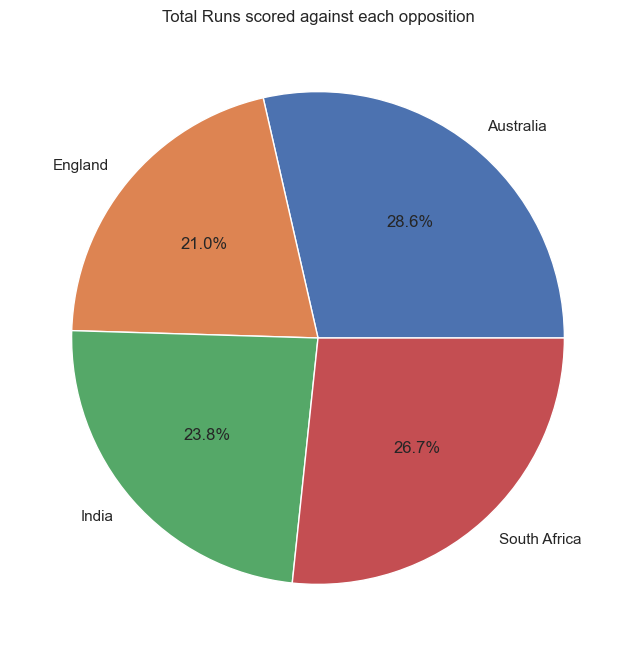

In [59]:
#Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(df_grouped,labels=df_grouped.index,autopct='%1.1f%%')
plt.title('Total Runs scored against each opposition')
plt.show()